In [3]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import KFold


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

SEED=42
cpu=-1
datasetFolder="C:\\Users\\sugii syuji\\machinelearning"
def predict_score(model,x_train,y_train,x_test,y_test,name):
    model.fit(x_train,y_train)
    best_pipe=model.best_estimator_
    poly=best_pipe.named_steps["polynomial_features"]
    poly_features=poly.get_feature_names_out(list(x_train.columns))
    selector=best_pipe.named_steps["feature_selection"]
    select_indices=selector.get_support(1)
    select_features=poly_features[select_indices]
    y_predict=model.predict(x_test)
    f1=f1_score(y_test,y_predict)
    auc_score=roc_auc_score(y_test,y_predict)
    return f1,auc_score,select_features
    
def baseDataSet(classFile):
    df=pd.read_csv(classFile,encoding_errors="replace")
    df=df.dropna(how="any")
    df=df[["dit_x","fanin_x","fanout_x","lcc_x","lcom*_x","loc_x","noc_x","rfc_x","innerClassesQty_x","totalFieldsQty_x","totalMethodsQty_x","wmc_x","GodClass"]]
    x=df.drop(columns="GodClass")
    y=df[["GodClass"]].values.ravel()
    return x,y

def addMetricsDataSet(classFile):
    df=pd.read_csv(classFile,encoding_errors="replace")
    df=df.dropna(how="any")
    df=df[["dit_x","fanin_x","fanout_x","lcc_x","lcom*_x","loc_x","noc_x","rfc_x","innerClassesQty_x","totalFieldsQty_x","totalMethodsQty_x","wmc_x","BUR_x","BOvR_x","ATFD_x","ATLD_x","LAA_x","GodClass"]]
    x=df.drop(columns="GodClass")
    y=df[["GodClass"]].values.ravel()
    return x,y

def baseVersionDataSet(classFile):
    df=pd.read_csv(classFile,encoding_errors="replace")
    df=df.dropna(how="any")
    df=df[["dit_x","fanin_x","fanout_x","lcc_x","lcom*_x","loc_x","noc_x","rfc_x","innerClassesQty_x","totalFieldsQty_x","totalMethodsQty_x","wmc_x","dit_y","fanin_y","fanout_y","lcc_y","lcom*_y","loc_y","noc_y","rfc_y","innerClassesQty_y","totalFieldsQty_y","totalMethodsQty_y","wmc_y","GodClass"]]
    factors=["dit","fanin","fanout","lcc","lcom*","loc","noc","rfc","innerClassesQty","totalFieldsQty","totalMethodsQty","wmc"]
    for factor in factors:
        df[factor+"_y"]=df[factor+"_x"]-df[factor+"_y"]
    x=df.drop(columns="GodClass")
    y=df[["GodClass"]].values.ravel()
    return x,y

def addMetricsVersionDataSet(classFile):
    df=pd.read_csv(classFile,encoding_errors="replace")
    df=df.dropna(how="any")
    df=df[['dit_x', 'fanin_x', 'fanout_x', 'lcc_x', 'lcom*_x', 'loc_x', 'noc_x', 'rfc_x', 'innerClassesQty_x', 'totalFieldsQty_x', 'totalMethodsQty_x', 'wmc_x', 'BUR_x', 'BOvR_x', 'ATFD_x', 'ATLD_x', 'LAA_x', 'dit_y', 'fanin_y', 'fanout_y', 'lcc_y', 'lcom*_y', 'loc_y', 'noc_y', 'rfc_y', 'innerClassesQty_y', 'totalFieldsQty_y', 'totalMethodsQty_y', 'wmc_y', 'BUR_y', 'BOvR_y', 'ATFD_y', 'ATLD_y', 'LAA_y',"GodClass"]]
    factors=["dit","fanin","fanout","lcc","lcom*","loc","noc","rfc","innerClassesQty","totalFieldsQty","totalMethodsQty","wmc","BUR","BOvR","ATFD","ATLD","LAA"]
    for factor in factors:
        df[factor+"_y"]=df[factor+"_x"]-df[factor+"_y"]
    x=df.drop(columns="GodClass")
    y=df[["GodClass"]].values.ravel()
    return x,y

def overSampling(x_train,y_train):
    x_sampling,y_sampling=SMOTE(sampling_strategy=0.2,random_state=SEED).fit_resample(x_train,y_train)
    return x_sampling,y_sampling

def createTrainTestData(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=SEED)
    x_TrainSampling,y_TrainSampling=overSampling(x_train,y_train)
    return x_TrainSampling,x_test,y_TrainSampling,y_test

In [4]:
GodClassFile=os.path.join(datasetFolder,"dataset2\\GodClass.csv")

x_base,y_base=baseDataSet(GodClassFile)
x_base_train,x_base_test,y_base_train,y_base_test=createTrainTestData(x_base,y_base)
base_score={"f1":[],"auc":[],"feature":[]}

x_add,y_add=addMetricsDataSet(GodClassFile)
x_add_train,x_add_test,y_add_train,y_add_test=createTrainTestData(x_add,y_add)
add_score={"f1":[],"auc":[],"feature":[]}

x_baseVersion,y_baseVersion=baseVersionDataSet(GodClassFile)
x_baseVersion_train,x_baseVersion_test,y_baseVersion_train,y_baseVersion_test=createTrainTestData(x_baseVersion,y_baseVersion)
baseVersion_score={"f1":[],"auc":[],"feature":[]}
print(x_baseVersion[x_baseVersion["loc_y"]!=0])

x_addVersion,y_addVersion=addMetricsVersionDataSet(GodClassFile)
x_addVersion_train,x_addVersion_test,y_addVersion_train,y_addVersion_test=createTrainTestData(x_addVersion,y_addVersion)
addVersion_score={"f1":[],"auc":[],"feature":[]}


       dit_x  fanin_x  fanout_x     lcc_x   lcom*_x  loc_x  noc_x  rfc_x  \
1228       1        1         4  0.083333  0.777778    360      0     69   
1351       1        2        16  0.019608  0.919438    622      0     80   
1361       2        1         6  0.206349  0.535714    915      0     65   
2721       1        1        12  0.604396  0.666667    215      0     27   
4329       2        3        21  0.000000  0.816327     88      0     16   
...      ...      ...       ...       ...       ...    ...    ...    ...   
47094      1        0        39  0.795322  0.714286   1017      0     48   
47140      2        0         3  0.000000  0.000000     26      0      3   
47516      1       20        13  0.414846  0.892641   4866      2     69   
47881      5       10         7  0.230769  0.857143    531      8      6   
47923      2        0         2  0.000000  0.000000     52      0     17   

       innerClassesQty_x  totalFieldsQty_x  ...  fanout_y     lcc_y   lcom*_y  \
1228  

In [11]:
name="DT"
DT_prameter={
    "classifier__criterion":["gini","entropy"],
    "classifier__max_depth":list(range(1,11)),
    "classifier__min_samples_split":list(range(2,21)),
    "classifier__min_samples_leaf":list(range(1,11)),
    "classifier__max_features":["sqrt","log2",None]
    }

k_range=np.arange(1,11,1)
for i in k_range:
    pipline=Pipeline([
        ("polynomial_features",PolynomialFeatures(degree=2)),
        ("minmaxscaler",MinMaxScaler()),
        ("feature_selection",SelectKBest(score_func=f_classif,k=i)),
        ("classifier",DecisionTreeClassifier(random_state=SEED))
    ])
    DT_model=RandomizedSearchCV(pipline, param_distributions=DT_prameter,cv=KFold(n_splits=10,shuffle=True,random_state=SEED),random_state=SEED,n_jobs=cpu)
    print(str(i))
    f1_base,auc_base,feature_base=predict_score(DT_model,x_base_train,y_base_train,x_base_test,y_base_test,name)
    base_score["f1"].append(f1_base)
    base_score["auc"].append(auc_base)
    base_score["feature"].append(feature_base)
    
    f1_add,auc_add,feature_add=predict_score(DT_model,x_add_train,y_add_train,x_add_test,y_add_test,name)
    add_score["f1"].append(f1_add)
    add_score["auc"].append(auc_add)
    add_score["feature"].append(feature_add)
    
    f1_baseVersion,auc_baseVersion,feature_baseVersion=predict_score(DT_model,x_baseVersion_train,y_baseVersion_train,x_baseVersion_test,y_baseVersion_test,name)
    baseVersion_score["f1"].append(f1_baseVersion)
    baseVersion_score["auc"].append(auc_baseVersion)
    baseVersion_score["feature"].append(feature_baseVersion)

    f1_addVersion,auc_addVersion,feature_addVersion=predict_score(DT_model,x_addVersion_train,y_addVersion_train,x_addVersion_test,y_addVersion_test,name)
    addVersion_score["f1"].append(f1_addVersion)
    addVersion_score["auc"].append(auc_addVersion)   
    addVersion_score["feature"].append(feature_addVersion)

    #features_baselist.append(baseDF.columns[features_base])
    #features_addlist.append(addMetricsDF.columns[features_add])


1


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

2


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

3


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

4


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

5


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

6


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

7


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

8


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

9


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

10


c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sugii syuji\AppData\Local\Programs\Python\Python313\Lib\site-packages\s

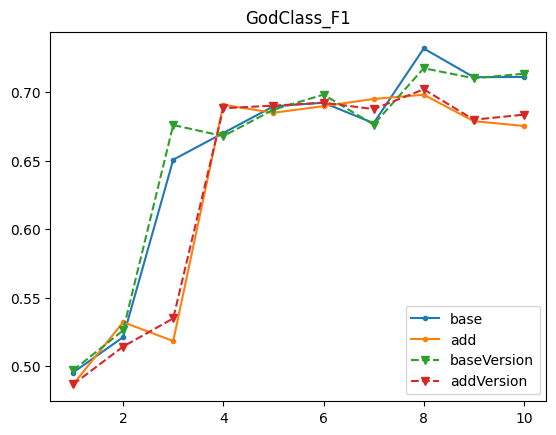

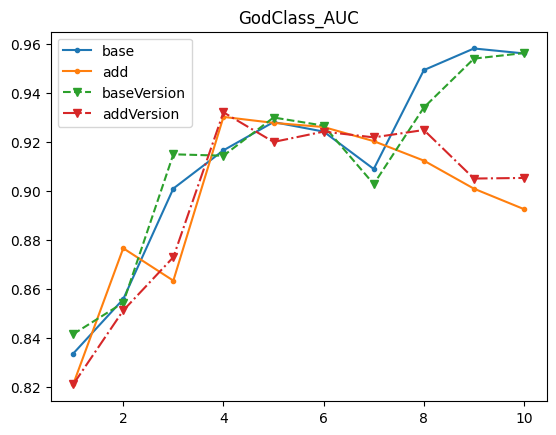

In [56]:
import matplotlib.pyplot as plt

x=k_range
plt.title("GodClass_F1")
plt.plot(x,base_score["f1"],label="base",marker=".")
plt.plot(x,add_score["f1"],label="add",marker=".")
plt.plot(x,baseVersion_score["f1"],label="baseVersion",linestyle="dashed",marker="v")
plt.plot(x,addVersion_score["f1"],label="addVersion",linestyle="dashed",marker="v")
plt.legend()
plt.show()

plt.title("GodClass_AUC")
plt.plot(x,base_score["auc"],label="base",marker=".")
plt.plot(x,add_score["auc"],label="add",marker=".")
plt.plot(x,baseVersion_score["auc"],label="baseVersion",linestyle="dashed",marker="v")
plt.plot(x,addVersion_score["auc"],label="addVersion",linestyle="dashdot",marker="v")
plt.legend()
plt.show()

In [13]:
print(base_score)
print(add_score)
print(baseVersion_score)
print(addVersion_score)

{'f1': [0.4954128440366973, 0.5212121212121212, 0.6506024096385542, 0.67008547008547, 0.6895368782161235, 0.6921739130434783, 0.6772486772486772, 0.7317073170731707, 0.7107438016528925, 0.7109634551495017], 'auc': [np.float64(0.8336096145876503), np.float64(0.8558675231385552), np.float64(0.9010222406409726), np.float64(0.916619180826081), np.float64(0.92815824008841), np.float64(0.9242644011603812), np.float64(0.9089955449647742), np.float64(0.949371460146429), np.float64(0.9582038264953724), np.float64(0.9561748860339826)], 'feature': [array(['rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x',
       'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=obj

{'f1': [0.4954128440366973, 0.5212121212121212, 0.6506024096385542, 0.67008547008547, 0.6895368782161235, 0.6921739130434783, 0.6772486772486772, 0.7317073170731707, 0.7107438016528925, 0.7109634551495017], 'auc': [np.float64(0.8336096145876503), np.float64(0.8558675231385552), np.float64(0.9010222406409726), np.float64(0.916619180826081), np.float64(0.92815824008841), np.float64(0.9242644011603812), np.float64(0.9089955449647742), np.float64(0.949371460146429), np.float64(0.9582038264953724), np.float64(0.9561748860339826)], 'feature': [array(['rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x',
       'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x loc_x', 'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x',
       'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'lcom*_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x',
       'lcom*_x^2', 'lcom*_x loc_x', 'lcom*_x rfc_x',
       'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'], dtype=object)]}

{'f1': [0.48673946957878317, 0.5321637426900585, 0.5184094256259205, 0.6905982905982906, 0.6848381601362862, 0.6896551724137931, 0.6948853615520282, 0.6980108499095841, 0.6787003610108303, 0.6752293577981652], 'auc': [np.float64(0.8210258668324354), np.float64(0.876649053736704), np.float64(0.8634091380024865), np.float64(0.930269201547175), np.float64(0.9278301560989087), np.float64(0.9261292996270203), np.float64(0.9203705622323526), np.float64(0.9124188423815445), np.float64(0.9009618041165907), np.float64(0.8925999792789058)], 'feature': [array(['rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'],
      dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x',
       'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x',
       'lcom*_x wmc_x', 'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x', 'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x', 'rfc_x LAA_x', 'ATFD_x LAA_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x',
       'rfc_x LAA_x', 'ATFD_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x',
       'rfc_x BUR_x', 'rfc_x LAA_x', 'ATFD_x LAA_x'], dtype=object)]}

{'f1': [0.49700598802395207, 0.5261538461538462, 0.6759098786828422, 0.6678082191780822, 0.6870748299319728, 0.6980802792321117, 0.6762075134168157, 0.7173144876325088, 0.71, 0.7133333333333334], 'auc': [np.float64(0.8415613344384584), np.float64(0.8544127296587927), np.float64(0.9150003453515678), np.float64(0.9144261983699405), np.float64(0.930023138555049), np.float64(0.9267034466086476), np.float64(0.9028267025832297), np.float64(0.934102603950822), np.float64(0.9540639245752176), np.float64(0.9563389280287332)], 'feature': [array(['rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x',
       'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x loc_x', 'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x',
       'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'lcom*_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x',
       'lcom*_x^2', 'lcom*_x loc_x', 'lcom*_x rfc_x',
       'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'], dtype=object)]}

{'f1': [0.48673946957878317, 0.5143721633888049, 0.5349182763744428, 0.688135593220339, 0.6900175131348512, 0.6921739130434783, 0.6875, 0.7019400352733686, 0.6797853309481217, 0.6834532374100719], 'auc': [np.float64(0.8210258668324354), np.float64(0.8512354952341483), np.float64(0.8730012778008013), np.float64(0.9321341000138141), np.float64(0.9200424782428512), np.float64(0.9242644011603812), np.float64(0.9219073767094903), np.float64(0.9249205691393839), np.float64(0.9051017060367456), np.float64(0.9053477690288715)], 'feature': [array(['rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'],
      dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x',
       'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x',
       'lcom*_x wmc_x', 'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x', 'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x', 'rfc_x LAA_x', 'ATFD_x LAA_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x',
       'rfc_x LAA_x', 'ATFD_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x',
       'rfc_x BUR_x', 'rfc_x LAA_x', 'ATFD_x LAA_x'], dtype=object)]}


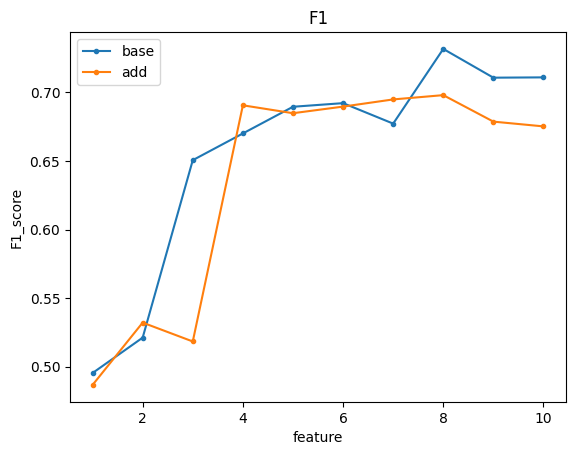

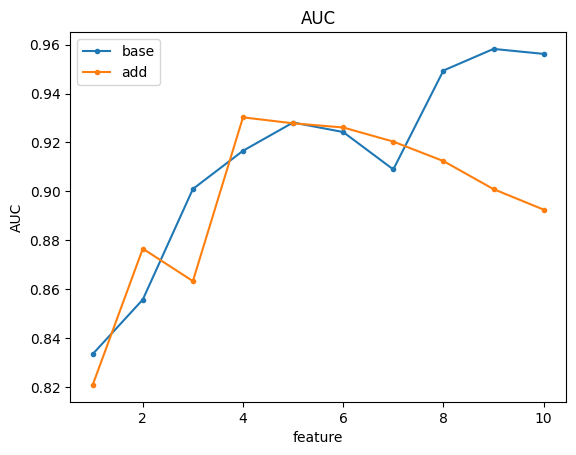

In [2]:
import numpy as np
import matplotlib.pyplot as plt
base_score={'f1': [0.4954128440366973, 0.5212121212121212, 0.6506024096385542, 0.67008547008547, 0.6895368782161235, 0.6921739130434783, 0.6772486772486772, 0.7317073170731707, 0.7107438016528925, 0.7109634551495017], 'auc': [np.float64(0.8336096145876503), np.float64(0.8558675231385552), np.float64(0.9010222406409726), np.float64(0.916619180826081), np.float64(0.92815824008841), np.float64(0.9242644011603812), np.float64(0.9089955449647742), np.float64(0.949371460146429), np.float64(0.9582038264953724), np.float64(0.9561748860339826)]}
add_score={'f1': [0.48673946957878317, 0.5321637426900585, 0.5184094256259205, 0.6905982905982906, 0.6848381601362862, 0.6896551724137931, 0.6948853615520282, 0.6980108499095841, 0.6787003610108303, 0.6752293577981652], 'auc': [np.float64(0.8210258668324354), np.float64(0.876649053736704), np.float64(0.8634091380024865), np.float64(0.930269201547175), np.float64(0.9278301560989087), np.float64(0.9261292996270203), np.float64(0.9203705622323526), np.float64(0.9124188423815445), np.float64(0.9009618041165907), np.float64(0.8925999792789058)]}
baseVersion_score={'f1': [0.49700598802395207, 0.5261538461538462, 0.6759098786828422, 0.6678082191780822, 0.6870748299319728, 0.6980802792321117, 0.6762075134168157, 0.7173144876325088, 0.71, 0.7133333333333334], 'auc': [np.float64(0.8415613344384584), np.float64(0.8544127296587927), np.float64(0.9150003453515678), np.float64(0.9144261983699405), np.float64(0.930023138555049), np.float64(0.9267034466086476), np.float64(0.9028267025832297), np.float64(0.934102603950822), np.float64(0.9540639245752176), np.float64(0.9563389280287332)]}
addVersion_score={'f1': [0.48673946957878317, 0.5143721633888049, 0.5349182763744428, 0.688135593220339, 0.6900175131348512, 0.6921739130434783, 0.6875, 0.7019400352733686, 0.6797853309481217, 0.6834532374100719], 'auc': [np.float64(0.8210258668324354), np.float64(0.8512354952341483), np.float64(0.8730012778008013), np.float64(0.9321341000138141), np.float64(0.9200424782428512), np.float64(0.9242644011603812), np.float64(0.9219073767094903), np.float64(0.9249205691393839), np.float64(0.9051017060367456), np.float64(0.9053477690288715)]}
x=np.arange(1,11,1)
plt.title("F1")
plt.xlabel("feature")
plt.ylabel("F1_score")
plt.plot(x,base_score["f1"],label="base",marker=".")
plt.plot(x,add_score["f1"],label="add",marker=".")
#plt.plot(x,baseVersion_score["f1"],label="baseVersion",linestyle="dashed",marker="v")
#plt.plot(x,addVersion_score["f1"],label="addVersion",linestyle="dashed",marker="v")
plt.legend()
plt.show()

plt.title("AUC")
plt.xlabel("feature")
plt.ylabel("AUC")
plt.plot(x,base_score["auc"],label="base",marker=".")
plt.plot(x,add_score["auc"],label="add",marker=".")
#plt.plot(x,baseVersion_score["auc"],label="baseVersion",linestyle="dashed",marker="v")
#plt.plot(x,addVersion_score["auc"],label="addVersion",linestyle="dashdot",marker="v")
plt.legend()
plt.show()

f1
base :  0.6895368782161235
add :  0.6848381601362862
baseVersion :  0.6870748299319728
auc
base :  0.92815824008841
add :  0.9278301560989087
baseVersion :  0.930023138555049
feature
base :  ['fanout_x' 'rfc_x' 'fanout_x lcom*_x' 'lcom*_x rfc_x' 'lcom*_x wmc_x']
add :  ['rfc_x' 'fanout_x lcom*_x' 'lcom*_x rfc_x' 'lcom*_x wmc_x' 'rfc_x LAA_x']
baseVersion :  ['fanout_x' 'rfc_x' 'fanout_x lcom*_x' 'lcom*_x rfc_x' 'lcom*_x wmc_x']


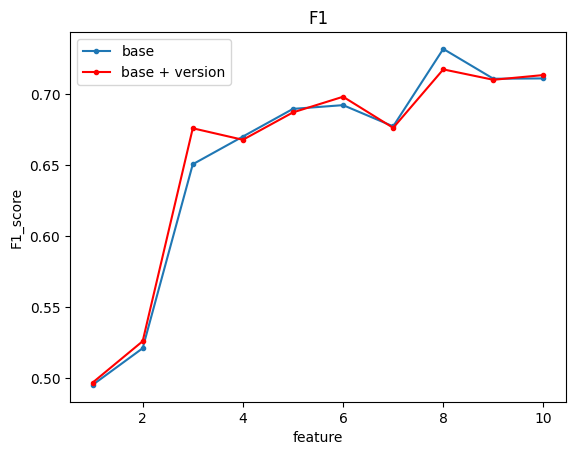

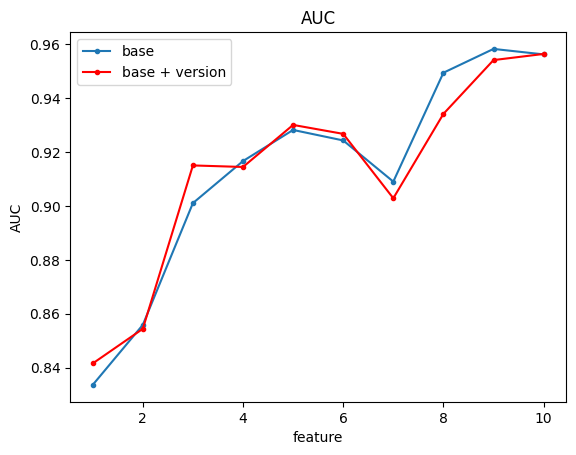

In [1]:
from numpy import array
import numpy as np
import matplotlib.pyplot as plt


base1_score={'f1': [0.4954128440366973, 0.5212121212121212, 0.6506024096385542, 0.67008547008547, 0.6895368782161235, 0.6921739130434783, 0.6772486772486772, 0.7317073170731707, 0.7107438016528925, 0.7109634551495017], 'auc': [np.float64(0.8336096145876503), np.float64(0.8558675231385552), np.float64(0.9010222406409726), np.float64(0.916619180826081), np.float64(0.92815824008841), np.float64(0.9242644011603812), np.float64(0.9089955449647742), np.float64(0.949371460146429), np.float64(0.9582038264953724), np.float64(0.9561748860339826)], 'feature': [array(['rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x',
       'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x loc_x', 'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x',
       'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'lcom*_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x',
       'lcom*_x^2', 'lcom*_x loc_x', 'lcom*_x rfc_x',
       'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'], dtype=object)]}

add1_score={'f1': [0.48673946957878317, 0.5321637426900585, 0.5184094256259205, 0.6905982905982906, 0.6848381601362862, 0.6896551724137931, 0.6948853615520282, 0.6980108499095841, 0.6787003610108303, 0.6752293577981652], 'auc': [np.float64(0.8210258668324354), np.float64(0.876649053736704), np.float64(0.8634091380024865), np.float64(0.930269201547175), np.float64(0.9278301560989087), np.float64(0.9261292996270203), np.float64(0.9203705622323526), np.float64(0.9124188423815445), np.float64(0.9009618041165907), np.float64(0.8925999792789058)], 'feature': [array(['rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'],
      dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x',
       'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x',
       'lcom*_x wmc_x', 'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x', 'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x', 'rfc_x LAA_x', 'ATFD_x LAA_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x',
       'rfc_x LAA_x', 'ATFD_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x',
       'rfc_x BUR_x', 'rfc_x LAA_x', 'ATFD_x LAA_x'], dtype=object)]}

baseVersion1_score={'f1': [0.49700598802395207, 0.5261538461538462, 0.6759098786828422, 0.6678082191780822, 0.6870748299319728, 0.6980802792321117, 0.6762075134168157, 0.7173144876325088, 0.71, 0.7133333333333334], 'auc': [np.float64(0.8415613344384584), np.float64(0.8544127296587927), np.float64(0.9150003453515678), np.float64(0.9144261983699405), np.float64(0.930023138555049), np.float64(0.9267034466086476), np.float64(0.9028267025832297), np.float64(0.934102603950822), np.float64(0.9540639245752176), np.float64(0.9563389280287332)], 'feature': [array(['rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x',
       'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x loc_x', 'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x',
       'lcom*_x wmc_x'], dtype=object), array(['fanout_x', 'lcom*_x', 'rfc_x', 'wmc_x', 'fanout_x lcom*_x',
       'lcom*_x^2', 'lcom*_x loc_x', 'lcom*_x rfc_x',
       'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x'], dtype=object)]}

addVersion_score={'f1': [0.48673946957878317, 0.5143721633888049, 0.5349182763744428, 0.688135593220339, 0.6900175131348512, 0.6921739130434783, 0.6875, 0.7019400352733686, 0.6797853309481217, 0.6834532374100719], 'auc': [np.float64(0.8210258668324354), np.float64(0.8512354952341483), np.float64(0.8730012778008013), np.float64(0.9321341000138141), np.float64(0.9200424782428512), np.float64(0.9242644011603812), np.float64(0.9219073767094903), np.float64(0.9249205691393839), np.float64(0.9051017060367456), np.float64(0.9053477690288715)], 'feature': [array(['rfc_x'], dtype=object), array(['rfc_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x'], dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x'],
      dtype=object), array(['rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x', 'lcom*_x wmc_x',
       'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x rfc_x',
       'lcom*_x wmc_x', 'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x', 'rfc_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x wmc_x', 'rfc_x LAA_x', 'ATFD_x LAA_x'],
      dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x',
       'rfc_x LAA_x', 'ATFD_x LAA_x'], dtype=object), array(['fanout_x', 'rfc_x', 'fanout_x lcom*_x', 'lcom*_x^2',
       'lcom*_x rfc_x', 'lcom*_x totalMethodsQty_x', 'lcom*_x wmc_x',
       'rfc_x BUR_x', 'rfc_x LAA_x', 'ATFD_x LAA_x'], dtype=object)]}

factors=["f1","auc","feature"]
for factor in factors:
    print(factor)
    print("base : ",base1_score[factor][4])
    print("add : ",add1_score[factor][4])
    print("baseVersion : ",baseVersion1_score[factor][4])
    
x=np.arange(1,11,1)
plt.title("F1")
plt.xlabel("feature")
plt.ylabel("F1_score")
plt.plot(x,base1_score["f1"],label="base",marker=".")
#plt.plot(x,add1_score["f1"],label="add",marker=".")
plt.plot(x,baseVersion1_score["f1"],label="base + version",marker=".",color="red")
#plt.plot(x,addVersion1_score["f1"],label="addVersion",linestyle="dashed",marker="v")
plt.legend()
plt.show()

plt.title("AUC")
plt.xlabel("feature")
plt.ylabel("AUC")
plt.plot(x,base1_score["auc"],label="base",marker=".")
#plt.plot(x,add_score["auc"],label="add",marker=".")
plt.plot(x,baseVersion1_score["auc"],label="base + version",color="red",marker=".")
#plt.plot(x,addVersion1_score["auc"],label="addVersion",linestyle="dashdot",marker="v")
plt.legend()
plt.show()
